### **Polynomial Linear Regression**

In [222]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### Generating Polynomial data

In [223]:
# y = 0.6x^2 + 0.1x + 2.3 + Some Noise
X = 6 * np.random.randn(200) + 3
y = (0.6*X**2) - (0.1*X) + 2.3 + np.random.randint(-30, 30, size = 200)

#### Train Test Split

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [225]:
lr = LinearRegression()

In [226]:
lr.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

#### Slope and Intercept

In [227]:
print(lr.coef_, lr.intercept_)

[3.48314768] 16.938169977277674


#### Plotting Scatter Plot

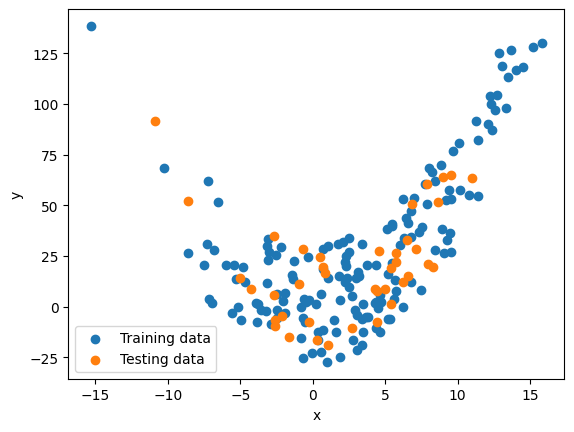

In [228]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Training data', 'Testing data'])
plt.show()

In [229]:
y_pred = lr.predict(X_test.reshape(-1, 1))

In [230]:
r2_score(y_test, y_pred)

-0.2640998681190143

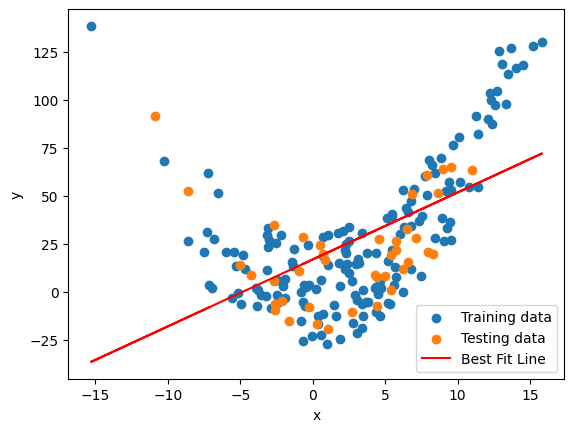

In [244]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.plot(X, lr.predict(X.reshape(-1, 1)), color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Training data', 'Testing data' , 'Best Fit Line'])
plt.show()

### **Simple Polynomial Linear Regression**

#### Feature Transformation
- PolynomialFeatures() used to transforma the data into its degrees (x^0, x^2, x^2...)

In [232]:
poly = PolynomialFeatures(degree = 2)
x_train_trans = poly.fit_transform(X_train.reshape(-1, 1))
x_test_trans = poly.transform(X_test.reshape(-1, 1))

In [233]:
poly_lr = LinearRegression()

In [234]:
poly_lr.fit(x_train_trans, y_train)

LinearRegression()

#### Model prediction and r2_score

In [235]:
y_pred = poly_lr.predict(x_test_trans)

In [236]:
r2_score(y_test, y_pred)

0.6569555277173781

#### Slope and Intercept

In [237]:
poly_lr.coef_

array([0.        , 0.25683235, 0.57792181])

In [238]:
poly_lr.intercept_

1.028785879056997

#### Ploting Graph
- The nature of graph is not the perfect for line plots as the values are not in sorted order.
- The random nature of X values are in -15 to 20, so generated same pattern values using linspace function

In [241]:
x_new = np.linspace(-15, 20, num = 200)
x_new_trans = poly.transform(x_new.reshape(-1, 1))
y_new = poly_lr.predict(x_new_trans)

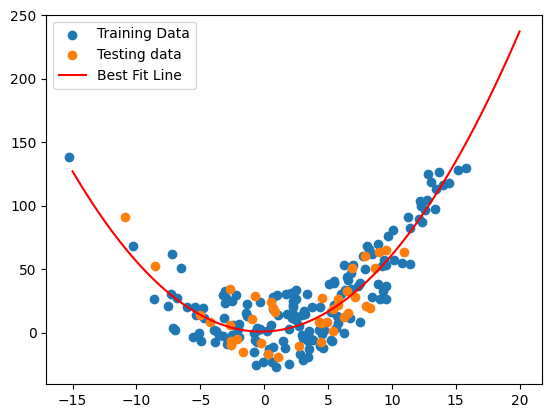

In [242]:
plt.scatter(X_train, y_train, label = 'Training Data')
plt.scatter(X_test, y_test, label = 'Testing data')
plt.plot(x_new, y_new, color = 'red', label = 'Best Fit Line')
plt.legend()
plt.show()

### **Polynomial Multiple Linear Regression**

In [347]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100, 1)

#### Plotting 3D Scatter Plot

In [348]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

#### Multiple Linear Regression

In [349]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

LinearRegression()

#### Best Fit Hyperplane

In [350]:
x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

In [352]:
final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

In [332]:
z_final = lr.predict(final).reshape(10,10)

In [333]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [354]:
X_multi = np.array([x,y]).reshape(100,2)

#### Feature Transformation

In [355]:
poly = PolynomialFeatures(degree=3)
X_multi_trans = poly.fit_transform(X_multi)

In [356]:
print("Powers\n",poly.powers_)

Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]]


In [357]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

#### Model Prediction and r2_score

In [358]:
z_pred = lr.predict(X_multi_trans)

In [359]:
r2_score(z, z_pred)

0.08438842825873993

#### Best Fit Hyperplane

In [360]:
X_test_multi = poly.transform(final)

In [361]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [362]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()